#**Milestone 3 and 4: Machine Learning**

## **Team Information**

Team Group: DEPI_GIZ2_AIS4_S7.

Team Number: 2.

Team Project Topic: Customer Churn Prediction and Analysis.

Team Github Repository: [CustomerChurnPredictionAndAnalysis_DEPI_GIZ2_AIS4_S7](https://github.com/Youstr1233/CustomerChurnPredictionAndAnalysis_DEPI_GIZ2_AIS4_S7).

Team Leader Name: Yousef Mohamed.

Team Members Names:
* Mariam Abdulnabi.
* Abdulrahman Ahmed.
* Khalid Mohammed.
* Mohammed Abdulhameed.
* Mohammed Ayoub.
* Hoor Hazem.

_____________________________________________________

##**Table of Contents**

1. **Milestone 3 Overview.**
__________________
2. **Preprocessing Dataset for Machine Learning**
__________________
3. **Milestone 4 Overview.**
_________________________________
4. **Logestic Regression.**
__________________
5. **Decision Tree.**
__________________________    
6. **Support Vector Machine.**

## **1. Milestone 3 Overview**




Data preprocessing for machine learning model is essential part to train machine learning model. __Normalization and Standardization__ are used for numerical columns. __Label and one hot encoding__ are used for categorical columns. The preprocessing techniques will be used depending on the machine learning algorithm.
___________________________________

## **2. Preprocessing Dataset for Machine Learning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

read_tc=pd.read_csv('/content/telecom_churn.csv')
read_tc.head(10)

#to check for missing values
read_tc.isnull().sum()

#to check for negative  values
(read_tc['estimated_salary']<0).any()

(read_tc['calls_made']<0).any()

(read_tc['sms_sent']<0).any()

(read_tc['data_used']<0).any()

#to handle negative  values
read_tc['estimated_salary']=read_tc['estimated_salary'].abs()
read_tc['calls_made']=read_tc['calls_made'].abs()
read_tc['sms_sent']=read_tc['sms_sent'].abs()
read_tc['data_used']=read_tc['data_used'].abs()


(read_tc['estimated_salary']<0).any()
(read_tc['calls_made']<0).any()
(read_tc['sms_sent']<0).any()
(read_tc['data_used']<0).any()

#to check the data type of each column.
read_tc.dtypes


#to scale each column  for faster training


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Select the numerical columns you want to scale
targeted_columns=['estimated_salary','calls_made','sms_sent','data_used']


#Scaling

scaled_stand_targeted_columns=read_tc[targeted_columns].copy()
scaled_stand_columns=StandardScaler().fit_transform(scaled_stand_targeted_columns)

# Create a new DataFrame with the scaled values (optional, but good for inspection)
#scaled_stand_columns = pd.DataFrame(scaled_stand_columns, columns=targeted_columns)


# Create new columns in the original DataFrame for standardized values
scaled_read_tc_standard = pd.DataFrame(scaled_stand_columns, columns=[col + '_standardized' for col in targeted_columns])
read_tc = pd.concat([read_tc, scaled_read_tc_standard], axis=1)
read_tc.head(10)

#Normalization

normalized_columns= MinMaxScaler().fit_transform(scaled_stand_targeted_columns)


# Create a new DataFrame with the scaled values (optional)
#normalized_columns = pd.DataFrame(normalized_columns, columns=targeted_columns)



# Create new columns in the original DataFrame for normalized values
scaled_read_tc_minmax = pd.DataFrame(normalized_columns, columns=[col + '_normalized' for col in targeted_columns])
read_tc = pd.concat([read_tc, scaled_read_tc_minmax], axis=1)


read_tc.head(10)


,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,...,data_used,churn,estimated_salary_standardized,calls_made_standardized,sms_sent_standardized,data_used_standardized,estimated_salary_normalized,calls_made_normalized,sms_sent_normalized,data_used_normalized
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,...,361,0,1.064837,-0.179803,1.442100,-1.595179,0.807406,0.407407,0.849057,0.032845
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,...,5973,0,1.213975,0.439057,1.028375,0.330625,0.850437,0.574074,0.735849,0.543445
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,...,193,1,1.701113,-0.007897,-0.005937,-1.652830,0.990992,0.453704,0.452830,0.017560
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,...,9377,1,-1.234351,1.057918,0.063017,1.498735,0.144016,0.740741,0.471698,0.853153
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,...,1393,0,-0.797761,0.989156,-0.626525,-1.241040,0.269987,0.722222,0.283019,0.126740
5,6,Vodafone,M,36,Uttarakhand,Chennai,120612,2020-01-01,1,73452,...,8109,0,-0.308437,1.436110,-0.005937,1.063611,0.411172,0.842593,0.452830,0.737785
6,7,BSNL,F,60,Karnataka,Delhi,609616,2020-01-01,1,110035,...,8512,0,0.666878,-0.454852,-0.764433,1.201904,0.692582,0.333333,0.245283,0.774452
7,8,BSNL,M,46,Arunachal Pradesh,Kolkata,866786,2020-01-01,4,104541,...,2245,1,0.520406,1.298586,1.097329,-0.948669,0.650320,0.805556,0.754717,0.204258
8,9,Reliance Jio,F,53,Himachal Pradesh,Mumbai,765257,2020-01-01,2,79439,...,10039,0,-0.148822,-0.523614,-0.833387,1.725906,0.457227,0.314815,0.226415,0.913384
9,10,BSNL,F,57,Rajasthan,Mumbai,506308,2020-01-01,0,126422,...,567,0,1.103761,0.404676,0.614650,-1.524488,0.818637,0.564815,0.622642,0.051588


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('/content/cleaned_data_telecomchurn.csv')

In [ ]:
data[['registration_year', 'registration_month', 'registration_day','num_dependents','single or not']].head()

,registration_year,registration_month,registration_day,num_dependents,single or not
0,2020,1,1,4,Not single
1,2020,1,1,2,Not single
2,2020,1,1,0,Single
3,2020,1,1,1,Not single
4,2020,1,1,2,Not single


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           243553 non-null  int64 
 1   telecom_partner      243553 non-null  object
 2   gender               243553 non-null  object
 3   age                  243553 non-null  int64 
 4   age_decay_range      243553 non-null  int64 
 5   age_interval         243553 non-null  object
 6   state                243553 non-null  object
 7   city                 243553 non-null  object
 8   region               243553 non-null  object
 9   registration_year    243553 non-null  int64 
 10  registration_month   243553 non-null  int64 
 11  registration_day     243553 non-null  int64 
 12  num_dependents       243553 non-null  int64 
 13  single or not        243553 non-null  object
 14  estimated_salary     243553 non-null  int64 
 15  calls_made           243553 non-nu

In [ ]:
data_scaled = data.copy()

In [ ]:
#Encode 'single or not': Single = 1, Not single = 0
data_scaled['single_or_not_encoded'] = data_scaled['single or not'].map({'Single': 1, 'Not single': 0})

In [ ]:
data_scaled[['single or not']].value_counts()

,count
single or not,
Not single,194626
Single,48927


In [ ]:
data_scaled[['single or not', 'single_or_not_encoded']].head()

,single or not,single_or_not_encoded
0,Not single,0
1,Not single,0
2,Single,1
3,Not single,0
4,Not single,0


In [ ]:
registration_data = data[['registration_year', 'registration_month', 'registration_day']].rename(
    columns={
        'registration_year': 'year',
        'registration_month': 'month',
        'registration_day': 'day'
    }
)
data['registration_date'] = pd.to_datetime(registration_data[['year', 'month', 'day']])

In [ ]:
# 2. Extract useful features from registration_date
data['registration_dayofweek'] = data['registration_date'].dt.dayofweek  # Monday=0, Sunday=6
data['registration_dayofyear'] = data['registration_date'].dt.dayofyear
data['days_since_registration'] = (pd.to_datetime("today") - data['registration_date']).dt.days

In [ ]:
# 3. Choose numeric columns for standardization (excluding ID columns and target)
numeric_cols = ['registration_dayofweek', 'registration_dayofyear', 'days_since_registration']

In [ ]:
# Apply Standardization
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [ ]:
# Show the transformed features
data_scaled[numeric_cols + ['churn']].head()

,registration_dayofweek,registration_dayofyear,days_since_registration,churn
0,-0.499736,-1.587525,1.730623,0
1,-0.499736,-1.587525,1.730623,0
2,-0.499736,-1.587525,1.730623,1
3,-0.499736,-1.587525,1.730623,1
4,-0.499736,-1.587525,1.730623,0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Step 2: Basic data info
def basic_info(data):
    print("\nBasic Information:")
    print(data.info())
    print("\nStatistical Summary:")
    print(data.describe())

# Step 3: Check for missing values
def check_missing(data, columns):
    missing = data[columns].isnull().sum()
    print("\nMissing Values:")
    print(missing)

# Step 4: Handle missing values
def handle_missing(data):
    data['age'].fillna(data['age'].median(), inplace=True)
    data['gender'].fillna(data['gender'].mode()[0], inplace=True)
    data['telecom_partner'].fillna('Unknown', inplace=True)
    data['age_decay_range'].fillna(data['age_decay_range'].median(), inplace=True)
    data['age_interval'].fillna(data['age_interval'].median(), inplace=True)
    print("\nMissing values handled.")

# Step 5: Check for negative values
def check_negative(data, columns):
    negative_counts = {col: (data[col] < 0).sum() for col in columns}
    print("\nNegative Values:")
    print(negative_counts)

# Step 6: Handle negative values
def handle_negative(data):
    data['age'] = data['age'].abs()
    data['age_decay_range'] = data['age_decay_range'].abs()
    data['age_interval'] = data['age_interval'].abs()
    print("\nNegative values handled.")

# Step 7: Visualization
def visualize_data(data):
    plt.figure(figsize=(15, 10))
    sns.histplot(data['age'], kde=True)
    plt.title('Distribution of Age')
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.countplot(data=data, x='gender')
    plt.title('Gender Distribution')
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.countplot(data=data, x='telecom_partner')
    plt.title('Telecom Partner Distribution')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(data[['age', 'age_decay_range', 'age_interval']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Main function
def main():
    file_path = input("Enter the file path: ")
    data = load_data(file_path)
    if data is not None:
        basic_info(data)
        check_missing(data, ['telecom_partner', 'gender', 'age', 'age_decay_range', 'age_interval'])
        handle_missing(data)
        check_negative(data, ['age', 'age_decay_range', 'age_interval'])
        handle_negative(data)
        visualize_data(data)

if __name__ == "__main__":
    main()

## **3.  Milestone 4 Overview**





In this project, classifier models will be used because churn column is __binary categorical__ column. So, there are many classifier models will be tested to choose the most efficient model for the problem.

___________________________________

## **4. Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('/content/cleaned_data_telecomchurn.csv')

In [ ]:
data[['registration_year', 'registration_month', 'registration_day','num_dependents','single or not']].head()

,registration_year,registration_month,registration_day,num_dependents,single or not
0,2020,1,1,4,Not single
1,2020,1,1,2,Not single
2,2020,1,1,0,Single
3,2020,1,1,1,Not single
4,2020,1,1,2,Not single


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           243553 non-null  int64 
 1   telecom_partner      243553 non-null  object
 2   gender               243553 non-null  object
 3   age                  243553 non-null  int64 
 4   age_decay_range      243553 non-null  int64 
 5   age_interval         243553 non-null  object
 6   state                243553 non-null  object
 7   city                 243553 non-null  object
 8   region               243553 non-null  object
 9   registration_year    243553 non-null  int64 
 10  registration_month   243553 non-null  int64 
 11  registration_day     243553 non-null  int64 
 12  num_dependents       243553 non-null  int64 
 13  single or not        243553 non-null  object
 14  estimated_salary     243553 non-null  int64 
 15  calls_made           243553 non-nu

In [ ]:
data_scaled = data.copy()

In [ ]:
#Encode 'single or not': Single = 1, Not single = 0
data_scaled['single_or_not_encoded'] = data_scaled['single or not'].map({'Single': 1, 'Not single': 0})

In [ ]:
data_scaled[['single or not']].value_counts()

,count
single or not,
Not single,194626
Single,48927


In [ ]:
data_scaled[['single or not', 'single_or_not_encoded']].head()

,single or not,single_or_not_encoded
0,Not single,0
1,Not single,0
2,Single,1
3,Not single,0
4,Not single,0


In [ ]:
registration_data = data[['registration_year', 'registration_month', 'registration_day']].rename(
    columns={
        'registration_year': 'year',
        'registration_month': 'month',
        'registration_day': 'day'
    }
)
data['registration_date'] = pd.to_datetime(registration_data[['year', 'month', 'day']])

In [ ]:
# 2. Extract useful features from registration_date
data['registration_dayofweek'] = data['registration_date'].dt.dayofweek  # Monday=0, Sunday=6
data['registration_dayofyear'] = data['registration_date'].dt.dayofyear
data['days_since_registration'] = (pd.to_datetime("today") - data['registration_date']).dt.days

In [ ]:
# 3. Choose numeric columns for standardization (excluding ID columns and target)
numeric_cols = ['registration_dayofweek', 'registration_dayofyear', 'days_since_registration']

In [ ]:
# Apply Standardization
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [ ]:
# Show the transformed features
data_scaled[numeric_cols + ['churn']].head()

,registration_dayofweek,registration_dayofyear,days_since_registration,churn
0,-0.499736,-1.587525,1.730623,0
1,-0.499736,-1.587525,1.730623,0
2,-0.499736,-1.587525,1.730623,1
3,-0.499736,-1.587525,1.730623,1
4,-0.499736,-1.587525,1.730623,0


In [ ]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# 3. Select features and target
data_scaled['single_or_not_encoded'] = data_scaled['single or not'].map({'Single': 1, 'Not single': 0})
X = data_scaled[['age', 'num_dependents', 'single_or_not_encoded',
                'estimated_salary', 'calls_made', 'sms_sent', 'data_used',
                'registration_dayofweek', 'registration_dayofyear',
                'days_since_registration']]
y = data_scaled['churn']



In [ ]:
# 4. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("NaN values in y:", y.isna().sum())


NaN values in y: 0


In [ ]:
# 6. Make predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

In [ ]:
# Check for NaN in target
print("NaN count in y_train:", y_train.isna().sum())

# Check for NaN in features
print("NaN count in X_train:\n", X_train.isna().sum())

# Remove rows with NaN in either X_train or y_train
nan_mask = y_train.isna() | X_train.isna().any(axis=1)
X_train_clean = X_train[~nan_mask]
y_train_clean = y_train[~nan_mask]

NaN count in y_train: 0
NaN count in X_train:
 age                        0
num_dependents             0
single_or_not_encoded      0
estimated_salary           0
calls_made                 0
sms_sent                   0
data_used                  0
registration_dayofweek     0
registration_dayofyear     0
days_since_registration    0
dtype: int64


In [ ]:
assert not y_train_clean.isna().any(), "NaN still present in y_train!"
assert not X_train_clean.isna().any().any(), "NaN still present in X_train!"

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_clean, y_train_clean)

# Verify class balance
print("Class distribution after SMOTE:\n", pd.Series(y_res).value_counts())

Class distribution after SMOTE:
 churn
1    155798
0    155798
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    #  class_weight='balanced',  # Optional but recommended
    max_iter=1000,
    random_state=42
)
logreg.fit(X_res, y_res)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.61      0.69     38928
           1       0.20      0.39      0.26      9783

    accuracy                           0.57     48711
   macro avg       0.50      0.50      0.48     48711
weighted avg       0.68      0.57      0.61     48711


Confusion Matrix:


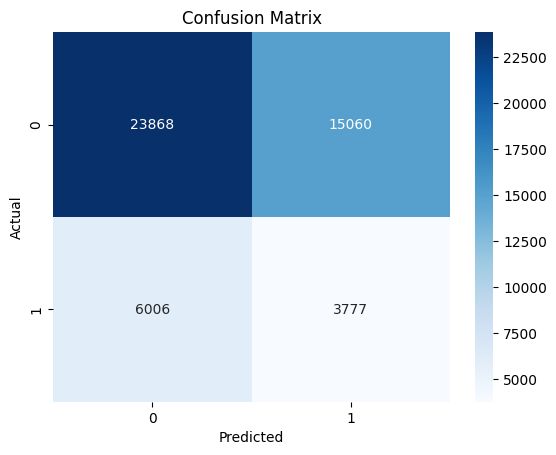

In [ ]:
# 7. Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")



Accuracy: 0.5675


In [ ]:
# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.4985


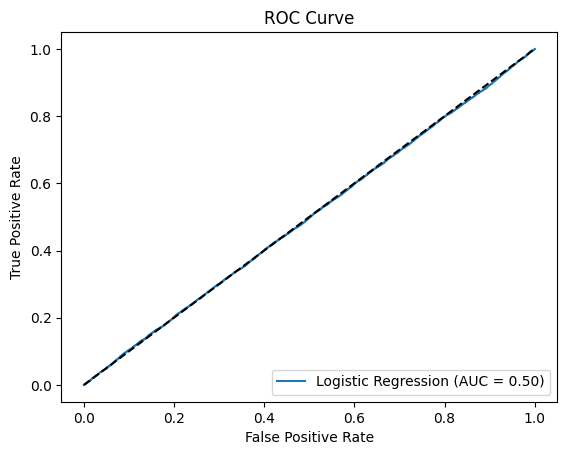

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': logreg.coef_[0]
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance)


Feature Importance:
                   Feature  Importance
0                      age    0.005554
8   registration_dayofyear    0.005087
4               calls_made    0.001642
5                 sms_sent    0.000220
6                data_used    0.000024
3         estimated_salary    0.000002
9  days_since_registration   -0.008449
7   registration_dayofweek   -0.008603
1           num_dependents   -0.411927
2    single_or_not_encoded   -1.988306


## **5. Decision Tree**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1 = pd.read_csv('/content/scaled_tc2.csv')

In [ ]:
data2 = pd.read_csv('/content/cleaned_data_telecomchurn (1).csv')

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           243553 non-null  int64 
 1   telecom_partner      243553 non-null  object
 2   gender               243553 non-null  object
 3   age                  243553 non-null  int64 
 4   age_decay_range      243553 non-null  int64 
 5   age_interval         243553 non-null  object
 6   state                243553 non-null  object
 7   city                 243553 non-null  object
 8   region               243553 non-null  object
 9   registration_year    243553 non-null  int64 
 10  registration_month   243553 non-null  int64 
 11  registration_day     243553 non-null  int64 
 12  num_dependents       243553 non-null  int64 
 13  single or not        243553 non-null  object
 14  estimated_salary     243553 non-null  int64 
 15  calls_made           243553 non-nu

In [ ]:
# Concatinating data 1 and data 2 to include columns that will be used

data3 = pd.concat([data1[["registration_dayofweek","registration_dayofyear","days_since_registration","num_dependents","single_or_not_encoded"]], data2[["age","estimated_salary","calls_made","sms_sent","data_used","churn","calls_made_negative","sms_sent_negative","data_used_negative"]]],axis=1, join="inner")

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   registration_dayofweek   243553 non-null  float64
 1   registration_dayofyear   243553 non-null  float64
 2   days_since_registration  243553 non-null  float64
 3   num_dependents           243553 non-null  int64  
 4   single_or_not_encoded    243553 non-null  int64  
 5   age                      243553 non-null  int64  
 6   estimated_salary         243553 non-null  int64  
 7   calls_made               243553 non-null  int64  
 8   sms_sent                 243553 non-null  int64  
 9   data_used                243553 non-null  int64  
 10  churn                    243553 non-null  int64  
 11  calls_made_negative      243553 non-null  int64  
 12  sms_sent_negative        243553 non-null  int64  
 13  data_used_negative       243553 non-null  int64  
dtypes: f

In [ ]:
# Splitting the features

x = data3.drop('churn', axis=1)
y = data3['churn']

In [ ]:
x

,registration_dayofweek,registration_dayofyear,days_since_registration,num_dependents,single_or_not_encoded,age,estimated_salary,calls_made,sms_sent,data_used,calls_made_negative,sms_sent_negative,data_used_negative
0,-0.499736,-1.587525,1.730623,4,0,25,124962,44,45,361,0,0,1
1,-0.499736,-1.587525,1.730623,2,0,55,130556,62,39,5973,0,0,0
2,-0.499736,-1.587525,1.730623,0,1,57,148828,49,24,193,0,0,0
3,-0.499736,-1.587525,1.730623,1,0,46,38722,80,25,9377,0,0,0
4,-0.499736,-1.587525,1.730623,2,0,26,55098,78,15,1393,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,-0.499736,-0.447850,-1.730623,3,0,28,130580,28,9,4102,0,0,0
243549,-0.499736,-0.447850,-1.730623,0,1,52,82393,80,45,7521,0,0,0
243550,-0.499736,-0.447850,-1.730623,4,0,59,51298,26,4,6547,0,0,0
243551,-0.499736,-0.447850,-1.730623,2,0,49,83981,80,15,1125,0,0,0


In [ ]:
y

,churn
0,0
1,0
2,1
3,1
4,0
...,...
243548,0
243549,0
243550,0
243551,0


In [ ]:
# make the dataset 80% training and 20% testing

from sklearn.model_selection import train_test_split

x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size = 0.6 , random_state = 42)

In [ ]:
# Get best hyper parameter

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
parmaters = {
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : [2,3,4,5],
    'min_samples_leaf' : [1,2],
    'min_samples_split' : [2,3]
}


grid = GridSearchCV(model , parmaters , cv = 5 , n_jobs= -1)

grid.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]})

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid.best_score_

np.float64(0.8002894651208254)

In [ ]:
# Implement best model

best_model = grid.best_estimator_
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [ ]:
best_model.score(x_test , y_test)

0.7990036405441655

In [ ]:
best_model.score(x_train , y_train)

0.8002997300376715

In [ ]:
y_pred = best_model.predict(x_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    116760
           1       0.00      0.00      0.00     29372

    accuracy                           0.80    146132
   macro avg       0.40      0.50      0.44    146132
weighted avg       0.64      0.80      0.71    146132


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


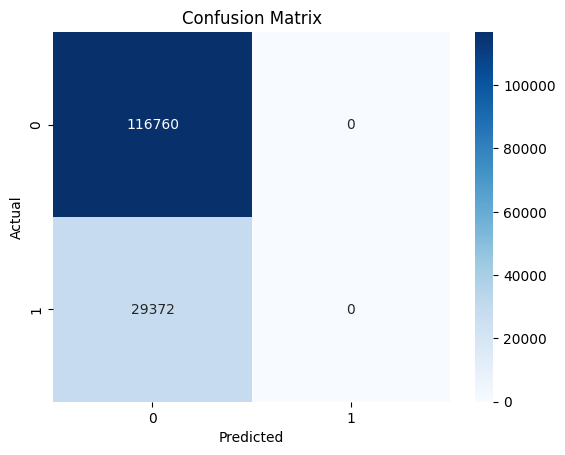

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# analyze the decision tree model

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This model has __bad recall__ and __precision__.

---



In [ ]:
# Apply SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x,y)
x_train2 , x_test2 ,y_train2 , y_test2 = train_test_split(X_resampled, y_resampled , test_size = 0.4 , random_state = 42)

In [ ]:
# Apply Random Forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced',max_depth=26,min_samples_leaf=1,min_samples_split=2 )
model.fit(x_train2, y_train2)

RandomForestClassifier(class_weight='balanced', max_depth=26)

In [ ]:
model.score(x_train2, y_train2)

0.937857072550723

In [ ]:
model.score(x_test2 , y_test2)

0.8046038990634288

In [ ]:
y_pred2 = model.predict(x_test2)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     77819
           1       0.86      0.73      0.79     77962

    accuracy                           0.80    155781
   macro avg       0.81      0.80      0.80    155781
weighted avg       0.81      0.80      0.80    155781


Confusion Matrix:


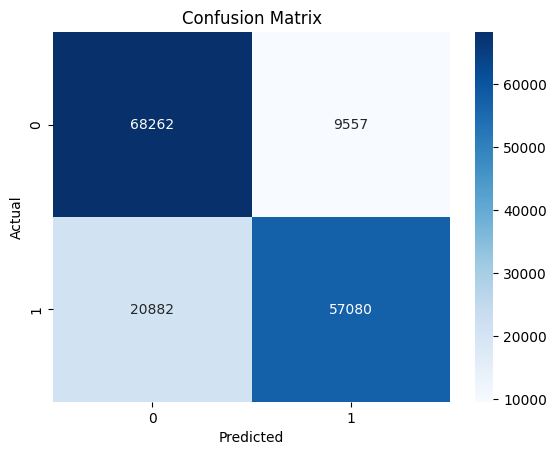

In [ ]:
# Test random forest model

print("Classification Report:")
print(classification_report(y_test2, y_pred2))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model has __good precision__ and __recall__ but the test score __is not close__ to the train score.
___________________________

## **6. Support Vector Machine**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
data = pd.read_csv('/content/cleaned_data_telecomchurn.csv')

In [ ]:
data

,Unnamed: 0,telecom_partner,gender,age,age_decay_range,age_interval,state,city,region,registration_year,...,num_dependents,single or not,estimated_salary,calls_made,calls_made_negative,sms_sent,sms_sent_negative,data_used,data_used_negative,churn
0,0,Reliance Jio,F,25,20,Young Adults,Karnataka,Kolkata,South India,2020,...,4,Not single,124962,44,0,45,0,361,1,0
1,1,Reliance Jio,F,55,50,Old Adults,Mizoram,Mumbai,Northeast India,2020,...,2,Not single,130556,62,0,39,0,5973,0,0
2,2,Vodafone,F,57,50,Old Adults,Arunachal Pradesh,Delhi,Northeast India,2020,...,0,Single,148828,49,0,24,0,193,0,1
3,3,BSNL,M,46,40,Old Adults,Tamil Nadu,Kolkata,South India,2020,...,1,Not single,38722,80,0,25,0,9377,0,1
4,4,BSNL,F,26,20,Old Adults,Tripura,Delhi,Northeast India,2020,...,2,Not single,55098,78,0,15,0,1393,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243548,Airtel,F,28,20,Old Adults,Mizoram,Kolkata,Northeast India,2023,...,3,Not single,130580,28,0,9,0,4102,0,0
243549,243549,Reliance Jio,F,52,50,Old Adults,Assam,Kolkata,Northeast India,2023,...,0,Single,82393,80,0,45,0,7521,0,0
243550,243550,Reliance Jio,M,59,50,Old Adults,Tripura,Kolkata,Northeast India,2023,...,4,Not single,51298,26,0,4,0,6547,0,0
243551,243551,BSNL,M,49,40,Old Adults,Madhya Pradesh,Kolkata,Central India,2023,...,2,Not single,83981,80,0,15,0,1125,0,0


telecom_partner        0
gender                 0
age                    0
age_decay_range        0
age_interval           0
state                  0
city                   0
region                 0
registration_year      0
registration_month     0
registration_day       0
num_dependents         0
single or not          0
estimated_salary       0
calls_made             0
calls_made_negative    0
sms_sent               0
sms_sent_negative      0
data_used              0
data_used_negative     0
churn                  0
dtype: int64
False
False
False
False
False
False
False
False
telecom_partner        object
gender                 object
age                     int64
age_decay_range         int64
age_interval           object
state                  object
city                   object
region                 object
registration_year       int64
registration_month      int64
registration_day        int64
num_dependents          int64
single or not          object
estimated_salary        

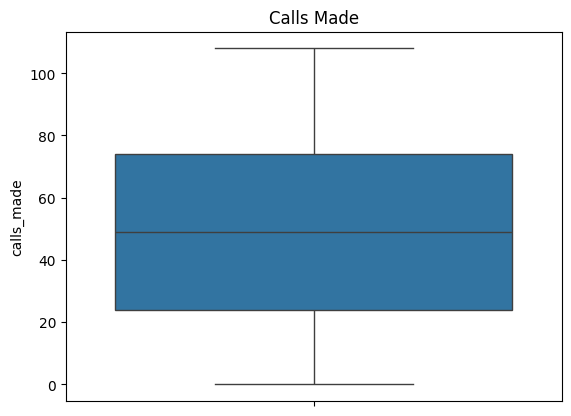

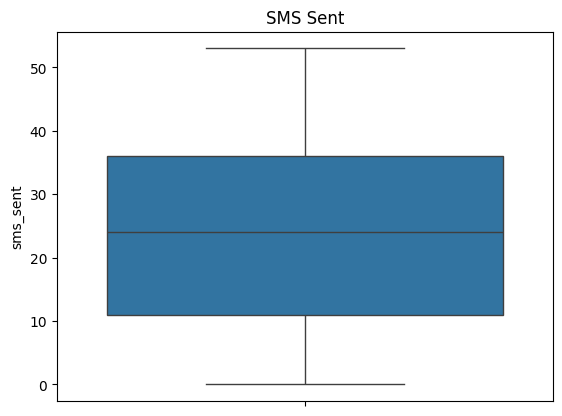

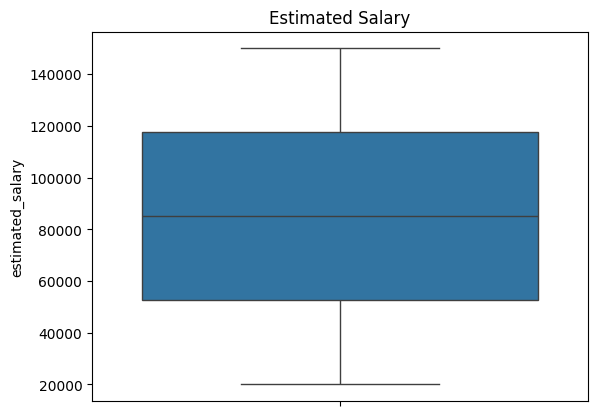

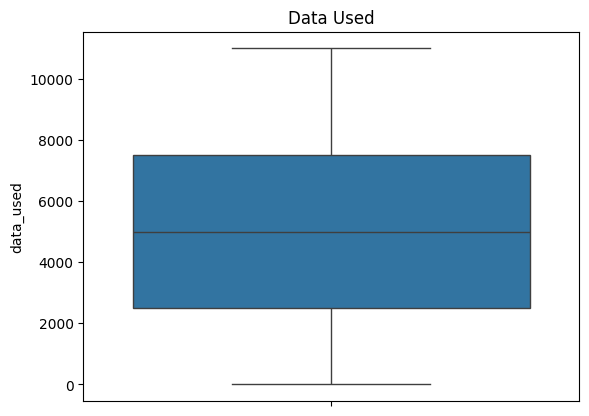

Index(['telecom_partner', 'gender', 'age', 'age_decay_range', 'age_interval',
       'state', 'city', 'region', 'registration_year', 'registration_month',
       'registration_day', 'num_dependents', 'single or not',
       'estimated_salary', 'calls_made', 'calls_made_negative', 'sms_sent',
       'sms_sent_negative', 'data_used', 'data_used_negative', 'churn',
       'estimated_salary_standardized', 'calls_made_standardized',
       'sms_sent_standardized', 'data_used_standardized',
       'estimated_salary_normalized', 'calls_made_normalized',
       'sms_sent_normalized', 'data_used_normalized', 'calls_made_log',
       'sms_sent_log', 'estimated_salary_log', 'data_used_log'],
      dtype='object')
  telecom_partner gender  age  age_decay_range  age_interval  \
0    Reliance Jio      F   25               20  Young Adults   
1    Reliance Jio      F   55               50    Old Adults   
2        Vodafone      F   57               50    Old Adults   
3            BSNL      M   46   

In [ ]:


# Drop unnecessary column
data = data.drop(columns=["Unnamed: 0"])

# ====== Check for missing values ======
print(data.isnull().sum())

# ====== Check for negative values ======
print((data['estimated_salary'] < 0).any())
print((data['calls_made'] < 0).any())
print((data['sms_sent'] < 0).any())
print((data['data_used'] < 0).any())

# ====== Handle negative values ======
data['estimated_salary'] = data['estimated_salary'].abs()
data['calls_made'] = data['calls_made'].abs()
data['sms_sent'] = data['sms_sent'].abs()
data['data_used'] = data['data_used'].abs()

# Re-check for negatives
print((data['estimated_salary'] < 0).any())
print((data['calls_made'] < 0).any())
print((data['sms_sent'] < 0).any())
print((data['data_used'] < 0).any())

# ====== Check data types ======
print(data.dtypes)

# ====== Scaling and Normalization ======
targeted_columns = ['estimated_salary', 'calls_made', 'sms_sent', 'data_used']

# Standardization
scaled_stand_columns = StandardScaler().fit_transform(data[targeted_columns])
scaled_read_tc_standard = pd.DataFrame(scaled_stand_columns, columns=[col + '_standardized' for col in targeted_columns])
data = pd.concat([data, scaled_read_tc_standard], axis=1)

# Normalization
normalized_columns = MinMaxScaler().fit_transform(data[targeted_columns])
scaled_read_tc_minmax = pd.DataFrame(normalized_columns, columns=[col + '_normalized' for col in targeted_columns])
data = pd.concat([data, scaled_read_tc_minmax], axis=1)

# ====== Handle Outliers ======
# Boxplots
sns.boxplot(data=data['calls_made'])
plt.title("Calls Made")
plt.show()

sns.boxplot(data=data['sms_sent'])
plt.title("SMS Sent")
plt.show()

sns.boxplot(data=data['estimated_salary'])
plt.title("Estimated Salary")
plt.show()

sns.boxplot(data=data['data_used'])
plt.title("Data Used")
plt.show()

# ====== Logarithmic Transformation ======
epsilon = 1e-5  # To avoid log(0)

data['calls_made_log'] = np.log(data['calls_made'] + epsilon)
data['sms_sent_log'] = np.log(data['sms_sent'] + epsilon)
data['estimated_salary_log'] = np.log(data['estimated_salary'] + epsilon)
data['data_used_log'] = np.log(data['data_used'] + epsilon)

# Show result
print(data.columns)
print(data.head())


In [ ]:
data_scaled = data.copy()


In [ ]:
#Encode 'single or not': Single = 1, Not single = 0
data_scaled['single_or_not_encoded'] = data_scaled['single or not'].map({'Single': 1, 'Not single': 0})

In [ ]:
data_scaled[['single or not']].value_counts()

,count
single or not,
Not single,194626
Single,48927


In [ ]:
data_scaled[['single or not', 'single_or_not_encoded']].head()

,single or not,single_or_not_encoded
0,Not single,0
1,Not single,0
2,Single,1
3,Not single,0
4,Not single,0


In [ ]:
registration_data = data[['registration_year', 'registration_month', 'registration_day']].rename(
    columns={
        'registration_year': 'year',
        'registration_month': 'month',
        'registration_day': 'day'
    }
)
data['registration_date'] = pd.to_datetime(registration_data[['year', 'month', 'day']])

In [ ]:
# 2. Extract useful features from registration_date
data['registration_dayofweek'] = data['registration_date'].dt.dayofweek  # Monday=0, Sunday=6
data['registration_dayofyear'] = data['registration_date'].dt.dayofyear
data['days_since_registration'] = (pd.to_datetime("today") - data['registration_date']).dt.days

In [ ]:
# 3. Choose numeric columns for standardization (excluding ID columns and target)
numeric_cols = ['registration_dayofweek', 'registration_dayofyear', 'days_since_registration']

In [ ]:
# Apply Standardization
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [ ]:
# Show the transformed features
data_scaled[numeric_cols + ['churn']].head()

,registration_dayofweek,registration_dayofyear,days_since_registration,churn
0,-0.499736,-1.587525,1.730623,0
1,-0.499736,-1.587525,1.730623,0
2,-0.499736,-1.587525,1.730623,1
3,-0.499736,-1.587525,1.730623,1
4,-0.499736,-1.587525,1.730623,0


In [ ]:
# Select only numeric columns (exclude any leftover strings)
X = data.drop(columns=["churn"])
X = X.select_dtypes(include=["number"])  # Keep only numeric columns
y = data["churn"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svm_model.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


# **Thank You**

_________________________________